Problem Statement:
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [1]:
#importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df= pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [4]:
#checking for null values in the data
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,True,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1164,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1165,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1166,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [5]:
#cheking the data by showing maximum columns
pd.set_option('display.max_column',None)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [6]:
#describing data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#checking all the columns in the data
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
##splitting data and showing the number columns only
num_columns=list(df.select_dtypes(exclude='object').columns)

In [9]:
#showing number columns
num_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [10]:
#splitting the data and showng objective colummns only
obj_column=list(df.select_dtypes(include='object').columns)

In [11]:
#objective columns
obj_column

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
#checking the unique values and count of num column
for col in num_columns:
    print(col,'=',df[col].nunique())

Id = 1168
MSSubClass = 15
LotFrontage = 106
LotArea = 892
OverallQual = 10
OverallCond = 9
YearBuilt = 110
YearRemodAdd = 61
MasVnrArea = 283
BsmtFinSF1 = 551
BsmtFinSF2 = 122
BsmtUnfSF = 681
TotalBsmtSF = 636
1stFlrSF = 669
2ndFlrSF = 351
LowQualFinSF = 21
GrLivArea = 746
BsmtFullBath = 4
BsmtHalfBath = 3
FullBath = 4
HalfBath = 3
BedroomAbvGr = 8
KitchenAbvGr = 4
TotRmsAbvGrd = 12
Fireplaces = 4
GarageYrBlt = 97
GarageCars = 5
GarageArea = 392
WoodDeckSF = 244
OpenPorchSF = 176
EnclosedPorch = 106
3SsnPorch = 18
ScreenPorch = 65
PoolArea = 8
MiscVal = 20
MoSold = 12
YrSold = 5
SalePrice = 581


In [13]:
#checking objective vaue counts and unique values
for col in obj_column:
    print(col,'=',df[col].nunique())

MSZoning = 5
Street = 2
Alley = 2
LotShape = 4
LandContour = 4
Utilities = 1
LotConfig = 5
LandSlope = 3
Neighborhood = 25
Condition1 = 9
Condition2 = 8
BldgType = 5
HouseStyle = 8
RoofStyle = 6
RoofMatl = 8
Exterior1st = 14
Exterior2nd = 15
MasVnrType = 4
ExterQual = 4
ExterCond = 5
Foundation = 6
BsmtQual = 4
BsmtCond = 4
BsmtExposure = 4
BsmtFinType1 = 6
BsmtFinType2 = 6
Heating = 6
HeatingQC = 5
CentralAir = 2
Electrical = 5
KitchenQual = 4
Functional = 7
FireplaceQu = 5
GarageType = 6
GarageFinish = 3
GarageQual = 5
GarageCond = 5
PavedDrive = 3
PoolQC = 3
Fence = 4
MiscFeature = 4
SaleType = 9
SaleCondition = 6


<AxesSubplot:>

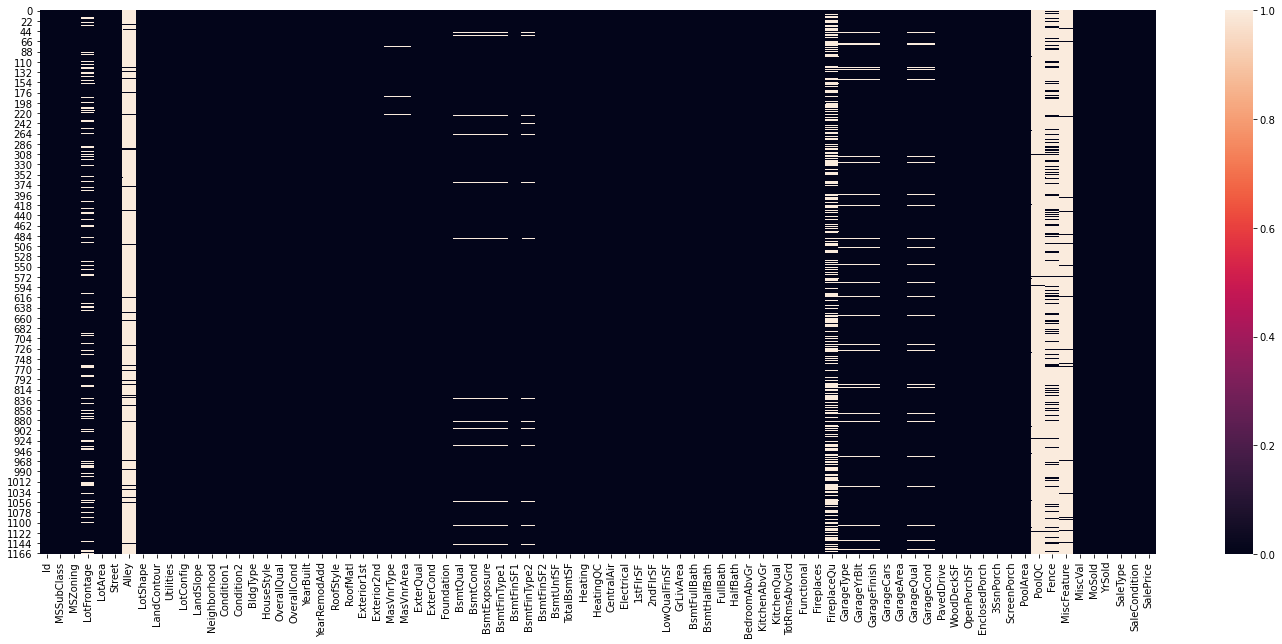

In [14]:
#plotting the heatmap for null values
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())

In [15]:
#checking the missing or null values in the data
df_nan = [i for i in df.columns if df[i].isnull().sum()>1 and df[i].dtypes == 'object']
for i in df_nan:
    print("{}: {}% missing values".format(i,np.round(df[i].isnull().mean(),3)))

Alley: 0.934% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.026% missing values
BsmtCond: 0.026% missing values
BsmtExposure: 0.027% missing values
BsmtFinType1: 0.026% missing values
BsmtFinType2: 0.027% missing values
FireplaceQu: 0.472% missing values
GarageType: 0.055% missing values
GarageFinish: 0.055% missing values
GarageQual: 0.055% missing values
GarageCond: 0.055% missing values
PoolQC: 0.994% missing values
Fence: 0.797% missing values
MiscFeature: 0.962% missing values


In [16]:
#checking the missing or null values in the data
df_nan = [i for i in df.columns if df[i].isnull().sum()>1 and df[i].dtypes == 'object']
for i in df_nan:
    print('{} : {}% missing'.format(i,np.round(df[i].isnull().mean(),3)))

Alley : 0.934% missing
MasVnrType : 0.006% missing
BsmtQual : 0.026% missing
BsmtCond : 0.026% missing
BsmtExposure : 0.027% missing
BsmtFinType1 : 0.026% missing
BsmtFinType2 : 0.027% missing
FireplaceQu : 0.472% missing
GarageType : 0.055% missing
GarageFinish : 0.055% missing
GarageQual : 0.055% missing
GarageCond : 0.055% missing
PoolQC : 0.994% missing
Fence : 0.797% missing
MiscFeature : 0.962% missing


In [17]:
#filling th missing data with mean
def categorical_nan(df,df_nan):
    df1 = df.copy()
    df1[df_nan] = df1[df_nan].fillna('No')
    return df1

In [18]:
# assigning the column into  cateogriacal
df = categorical_nan(df,df_nan)

In [19]:
#checking null values
df[df_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [20]:
#checking for missing value in the numerical columns
df_non= [ i for i in df.columns if df[i].isnull().sum()>1 and df[i].dtypes != 'object']
for i in df_non:
    print("{} :{}% missing values". format(i,np.round(df[i].isnull().mean(),3)))

LotFrontage :0.183% missing values
MasVnrArea :0.006% missing values
GarageYrBlt :0.055% missing values


In [21]:
#checking for null values in numerical columns
df[df_non].isnull().sum()

LotFrontage    214
MasVnrArea       7
GarageYrBlt     64
dtype: int64

In [22]:
#treating the null variables
for i in df_non:
    medianvalue= df[i].median()
    df[i].fillna(medianvalue, inplace=True)

In [23]:
#checking null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<AxesSubplot:>

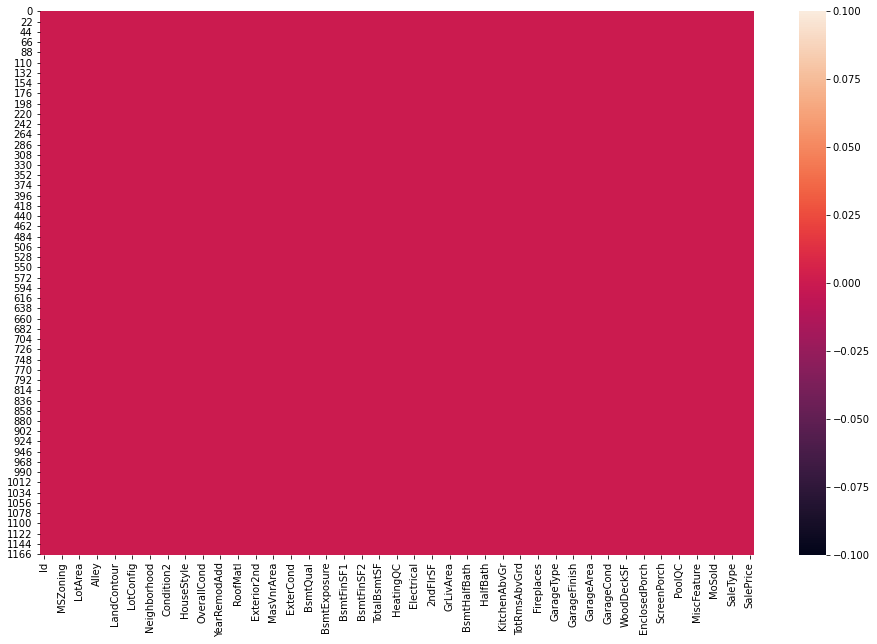

In [24]:
#plotting heatmap again for null values
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())

In [25]:
#checking max columns of the dataset
pd.set_option('display.max_column',None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,No,No,No,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,No,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,No,No,No,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,No,No,No,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,No,MnPrv,No,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,No,No,No,0,6,2009,WD,Normal,215000


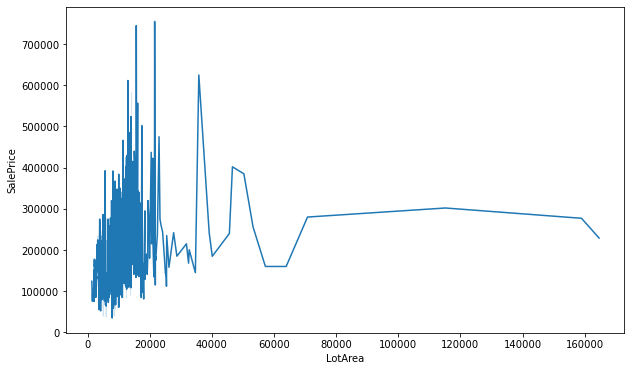

In [26]:
#plotting the lineplot chat for lot area and sales
plt.figure(figsize=(10,6))
sns.lineplot(df['LotArea'],df['SalePrice'])
plt.show()

property area under 20000 sq.ft. are more in the town and maximum plotting price lies under 6000 too 40000.

so there is the demand of 0-20000 square feet plot area.

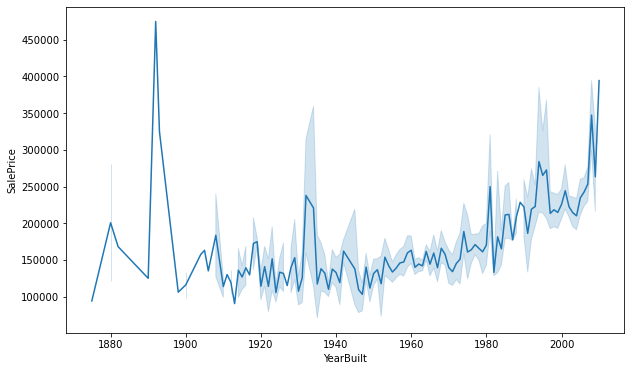

In [27]:
#plotting the chart to see the relationship between saleprice and year of house was built
plt.figure(figsize=(10,6))
sns.lineplot(df['YearBuilt'],df['SalePrice'])
plt.show()

newly built house prices are higher than old house which are made before 1980's. only some very old unique houses prices are high maybe they builted with unique style

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

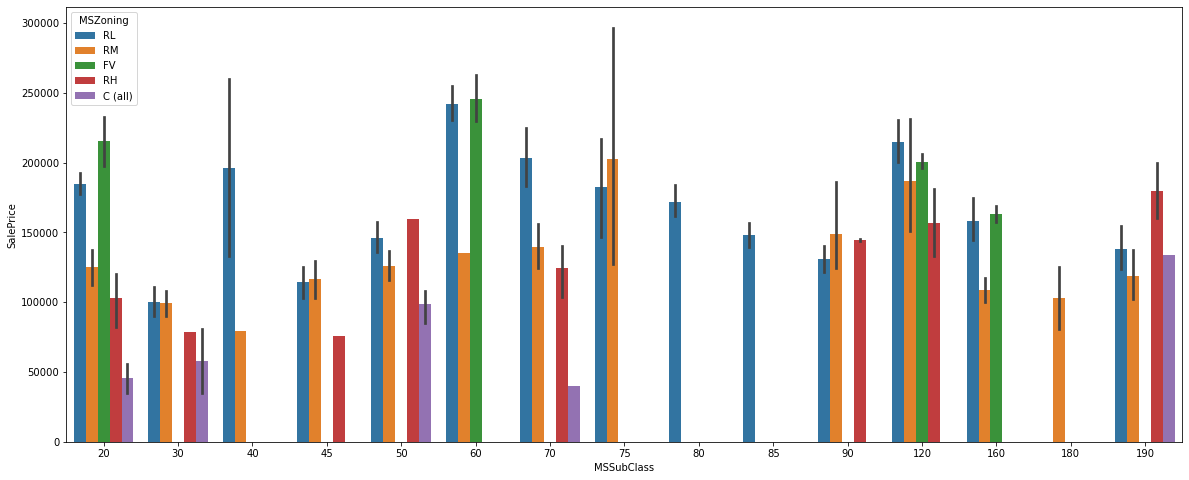

In [28]:
#plotting the chart to see the relationship between saleprice and sub class of the house and zone
plt.figure(figsize=(20,8))
sns.barplot(df['MSSubClass'],df['SalePrice'],hue=df['MSZoning'])

there are diffrent types of zones each zone having diffrent price ranges. in the barplot we can see RL zone areas having huge demand and prices are also as demand high.

dwellings in houses are have average demand and sales 

commercial spaces doesn't have high demands.

<function matplotlib.pyplot.show(close=None, block=None)>

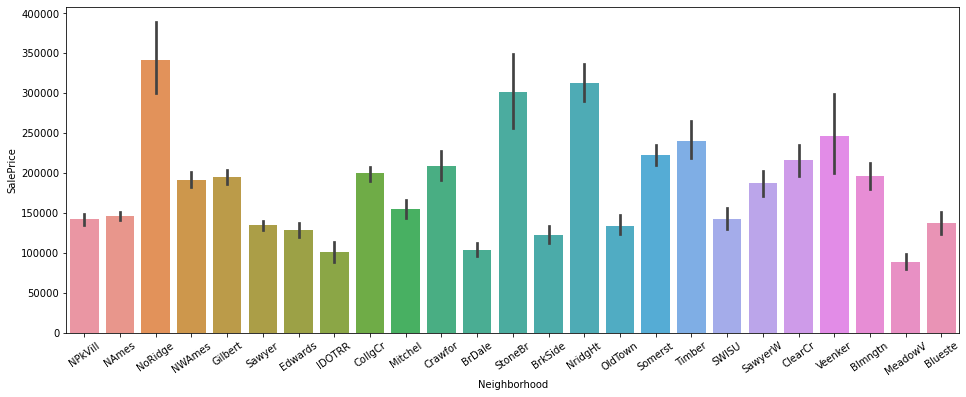

In [29]:
#plotting the chart to see the relationship between saleprice and neighborhood
plt.figure(figsize=(16,6))
sns.barplot(df['Neighborhood'],df['SalePrice'])
plt.xticks(rotation=35)
plt.show

noRidge,stoneBR and NridgeHT is kind of porsh area of something thire is price of houses are very high

tomber,somerst,veenker are having average pricebetween 20000-25000 so these area are more beneficial.

meadwV,Idotrr anf Brdale available in low price range

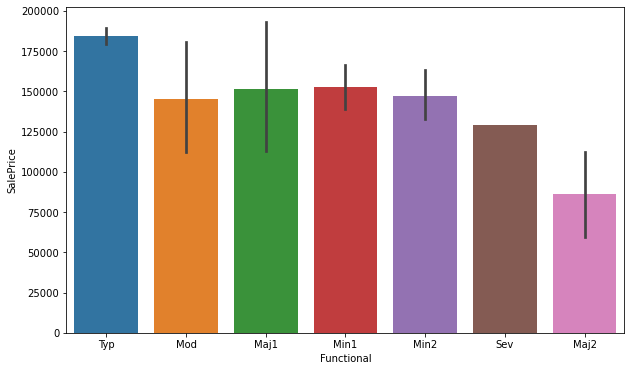

In [30]:
#plotting the chart to see the relationship between saleprice and functional area of house
plt.figure(figsize=(10,6))
sns.barplot(df['Functional'],df['SalePrice'])
plt.show()

houses with typ function having high price as compare to other functions. and mod,maj1,min1 and min2 having average price between 125000 to 150000 so this unctions are most considerable 

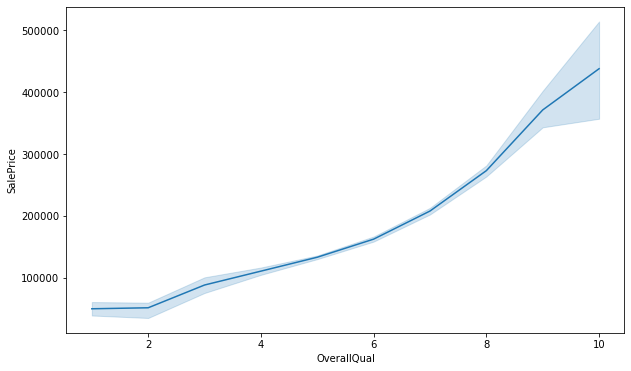

In [31]:
#plotting the chart to see the relationship between saleprice and overall quality of the house
plt.figure(figsize=(10,6))
sns.lineplot(df['OverallQual'],df['SalePrice'])
plt.show()

overall quality increases with sales price with property.

overallquality between 4 to 8 are having good market.

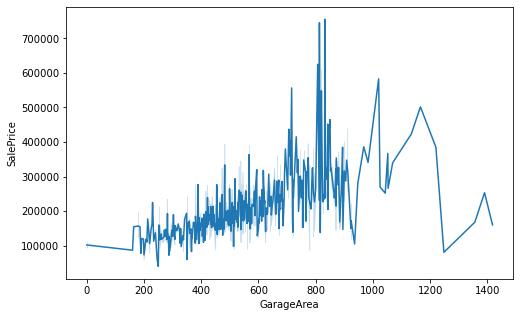

In [32]:
#plotting the chart to see the relationship between saleprice and garage area how it impact
plt.figure(figsize =(8,5))
sns.lineplot(df['GarageArea'],df['SalePrice'])
plt.show()

the slope is upwards. it shows the incresing trend.

the chart showing us the greater the ground area will increase the price. 

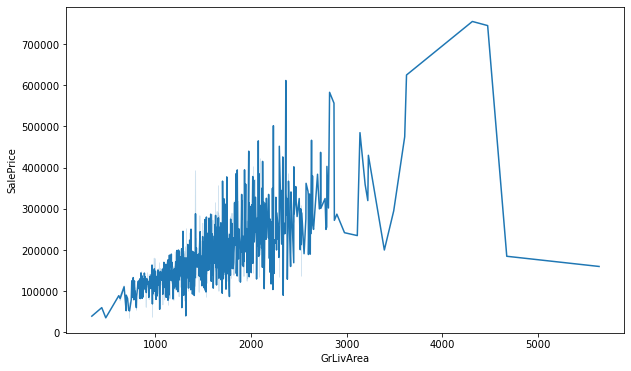

In [33]:
#plotting the chart to see the relationship between saleprice and gr liv area
plt.figure(figsize=(10,6))
sns.lineplot(df['GrLivArea'],df['SalePrice'])
plt.show()

there is much fluctuation in the data but thee trend is upwards shifting

the bars shows the greater the ground living area will higher the price.

In [34]:
#checking corrilation of data with each other
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006165,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.061397,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000585,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.074640,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006165,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.112000,0.089513,0.188273,0.227732,0.001253,0.115628,0.356180,0.402864,0.089816,0.008087,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,0.318941,0.228494,0.054459,0.260224,0.322750,0.087267,0.151044,0.021103,0.050499,0.030440,0.195973,-0.002830,0.022579,-0.004162,0.323851
LotArea,-0.029212,-0.124151,0.296790,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.036133,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.229981,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.506869,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.302585,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.112000,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.779860,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.089513,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.612726,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.061397,0.028215,0.188273,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,0.108974,0.362330,0.334512,0.172136,-0.070026,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.245879,0.340100,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,0.003868,-0.052236,0.227732,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.131114,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.

In [35]:
#checking correlation of variables with price of house
df.corrwith(df['SalePrice'])

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.323851
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.453840
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
dtype: float

overall quality, GrLivArea have more positive correlation with saleprice

TotalBsmtSF, garage for car having average positive relationship with saleprice.

there is no higher negative correlation.

# importing test data

In [36]:
#importing the test dataseet on which we need to predict the prices
df1= pd.read_csv('test.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [37]:
#setting option for dispaly the maximum rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
#checking the null values in the test data
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [39]:
#categorising thee data
df1= categorical_nan(df1,df_nan)

In [42]:
#cheecking missing data percentage
df1_non= [i for i in df1.columns if df1[i].isnull().sum()>1 and df1[i].dtypes!='object']
for i in df1_non:
    print('{} - {}% missing values'.format(i,np.round(df1[i].isnull().mean(),3)))

LotFrontage - 0.154% missing values
GarageYrBlt - 0.058% missing values


In [43]:
#filllinf the null values
for i in df1_non:
    medianvalue= df1[i].median()
    df1[i].fillna(medianvalue, inplace=True)

In [45]:
#filing the null values
for i in ['MasVnrArea','GarageYrBlt']:
    df1[i].replace(np.nan,0,inplace = True)

In [46]:
#filing the null values
print(df1['Electrical'].mode())
df1['Electrical']=df1['Electrical'].replace(np.nan,'SBrkr')

0    SBrkr
dtype: object


In [47]:
#checking for null values again after filling
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [48]:
#importing library
from sklearn import preprocessing

In [51]:
#using label encoder for preprocessing
label_enc= preprocessing.LabelEncoder()

df_new= df.drop('SalePrice',axis =1)
df_new1= df1

union= pd.concat([df_new, df_new1])

In [53]:
#transforming the data by data types
for i in df.columns:
    if df[i].dtypes == object:
        label_enc.fit(union[[i]])
        df[i]= label_enc.transform(df[[i]])
        df1[i] =label_enc.transform(df1[[i]]) 

In [54]:
#splitting the data or target column
x= df.drop('SalePrice', axis=1)
y= df[['SalePrice']]

In [60]:
#mporting library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [61]:
#using standard scaller to scale the data
sc= StandardScaler()
x= sc.fit_transform(x)
df1=sc.transform(df1)

In [64]:
from sklearn.feature_selection import f_classif

In [65]:
#using f value classifier to find out kbest
fvalue_best= SelectKBest(f_classif, k= 43)
x_kbest = fvalue_best.fit_transform(x, y)
test_kbest = fvalue_best.transform(df1)

In [66]:
x_train,x_test,y_train,y_test= train_test_split(x_kbest,y, test_size=0.25, random_state=0)

In [67]:
#checking the shape of data
x_train.shape

(876, 43)

In [68]:
#checking the shape of data
x_test.shape

(292, 43)

In [71]:
import math

In [75]:
#checking the fit score, r2 score, mean absolute error using different models
model = [Lasso(),DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression()]

for i in model:
    i.fit(x_train,y_train)
    print(i)
    print('fit score :', i.score(x_train,y_train))
    pred= i.predict(x_test)
    print('r2 score', r2_score(y_test,pred))
    print('mean absolute error', mean_absolute_error(y_test,pred))
    print('root mean squered error', math.sqrt(mean_squared_error(y_test,pred)))
    print("\n")

Lasso()
fit score : 0.8511948744276692
r2 score 0.6684146324912148
mean absolute error 21901.392323257453
root mean squered error 46663.0109290083


DecisionTreeRegressor()
fit score : 1.0
r2 score 0.6242793239685194
mean absolute error 29901.58219178082
root mean squered error 49671.54024345867


KNeighborsRegressor()
fit score : 0.8533746915569522
r2 score 0.7199214423294367
mean absolute error 23573.731506849315
root mean squered error 42885.94755376299


LinearRegression()
fit score : 0.8511948873517692
r2 score 0.6683973494795625
mean absolute error 21901.471561144077
root mean squered error 46664.22700627232




now we use the hyper parameter tunning for tune the data and get the best score with lasso 

In [76]:
#using grid serce cv to tune the data
from sklearn.model_selection import GridSearchCV

alphas = np.array([5, 0.5, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0])
g = GridSearchCV(Lasso(),dict(alpha = alphas))
g.fit(x_kbest,y)
g.best_params_

{'alpha': 5.0}

In [79]:
#tunning the data using lasso metgoed
lasso = Lasso(alpha = 5)
lasso.fit(x_train,y_train)
print(lasso)
print("fit score :",lasso.score(x_train,y_train))
pred=lasso.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean absolute error: ",mean_absolute_error(y_test,pred))
print("root mean squared error :",math.sqrt(mean_squared_error(y_test,pred)))
print("Cross_val_score for",lasso,"is",cross_val_score(lasso,x_kbest,y,cv=5,scoring='r2').mean())

Lasso(alpha=5)
fit score : 0.8511945966302158
r2 score : 0.6684790441334525
mean absolute error:  21901.042013733688
root mean squared error : 46658.47848059752
Cross_val_score for Lasso(alpha=5) is 0.7619980245913898


In [81]:
#finding r2 score, fit score , mean absolute error using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf)
print("fit score :",rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean absolute error: ",mean_absolute_error(y_test,pred))
print("root mean squared error :",math.sqrt(mean_squared_error(y_test,pred)))
print("Cross_val_score for",lasso,"is",cross_val_score(lasso,x_kbest,y,cv=5,scoring='r2').mean())

RandomForestRegressor()
fit score : 0.9776608111049723
r2 score : 0.8315798298858463
mean absolute error:  19973.497054794523
root mean squared error : 33256.162251102476
Cross_val_score for Lasso(alpha=5) is 0.7619980245913898


because random forest regressor r2 score and fit score does'nt have much diffrence and cross validation score is also good as compare to other models so we adopt these model.

In [82]:
# saving the model
import joblib
joblib.dump(rf,'houseprice.pkl')

['houseprice.pkl']

In [83]:
# Loading the model
joblib_model = joblib.load('houseprice.pkl')
joblib_model

RandomForestRegressor()

In [84]:
# predicting the prices
test_y = joblib_model.predict(test_kbest)
test_y

array([341833.58, 303438.42, 259313.98, 178843.19, 206335.46,  79727.  ,
       140335.73, 336914.03, 234284.91, 158847.65,  74517.71, 148202.25,
       128199.96, 175799.  , 334164.88, 126215.26, 109608.  , 113987.9 ,
       168112.74, 193524.7 , 159688.79, 148809.21, 150889.45,  79097.04,
       100134.99, 130671.58, 178440.45, 144522.07, 165249.15, 113303.41,
       148779.71, 180498.62, 229239.36, 160756.  , 109150.04, 173694.78,
       193167.5 , 108194.  , 159824.83, 151418.04, 104402.91, 313530.19,
       200795.52, 178812.89, 133128.82, 134083.5 , 125762.5 , 105613.29,
       202832.2 , 327038.83, 149702.  , 180469.  , 105822.9 ,  93102.54,
       280306.48, 121788.57, 138421.75, 182113.3 , 104671.17, 261796.45,
       102523.37, 164923.58, 136267.75, 142884.  , 193820.8 , 103095.91,
       150158.83, 203520.25, 137501.16, 154540.  , 355823.69, 154628.71,
       189942.2 , 141281.59, 141505.29, 237004.75, 301873.16, 206743.99,
       290041.32, 142465.5 , 214545.5 , 144442.15, 